In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
dataset=pd.read_csv("hate-speech-and-offensive-language.csv")
dataset

,count,hate_speech,offensive_language,neither,class,tweet
0,3,0,0,3,2,!!! RT @mayasolovely: As a woman you shouldn't...
1,3,0,3,0,1,!!!!! RT @mleew17: boy dats cold...tyga dwn ba...
2,3,0,3,0,1,!!!!!!! RT @UrKindOfBrand Dawg!!!! RT @80sbaby...
3,3,0,2,1,1,!!!!!!!!! RT @C_G_Anderson: @viva_based she lo...
4,6,0,6,0,1,!!!!!!!!!!!!! RT @ShenikaRoberts: The shit you...
...,...,...,...,...,...,...
24778,3,0,2,1,1,you's a muthaf***in lie &#8220;@LifeAsKing: @2...
24779,3,0,1,2,2,"you've gone and broke the wrong heart baby, an..."
24780,3,0,3,0,1,young buck wanna eat!!.. dat nigguh like I ain...
24781,6,0,6,0,1,youu got wild bitches tellin you lies


In [3]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 24783 entries, 0 to 24782
Data columns (total 6 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   count               24783 non-null  int64 
 1   hate_speech         24783 non-null  int64 
 2   offensive_language  24783 non-null  int64 
 3   neither             24783 non-null  int64 
 4   class               24783 non-null  int64 
 5   tweet               24783 non-null  object
dtypes: int64(5), object(1)
memory usage: 1.1+ MB


In [4]:
dataset.describe()

,count,hate_speech,offensive_language,neither,class
count,24783.000000,24783.000000,24783.000000,24783.000000,24783.000000
mean,3.243473,0.280515,2.413711,0.549247,1.110277
std,0.883060,0.631851,1.399459,1.113299,0.462089
min,3.000000,0.000000,0.000000,0.000000,0.000000
25%,3.000000,0.000000,2.000000,0.000000,1.000000
50%,3.000000,0.000000,3.000000,0.000000,1.000000
75%,3.000000,0.000000,3.000000,0.000000,1.000000
max,9.000000,7.000000,9.000000,9.000000,2.000000


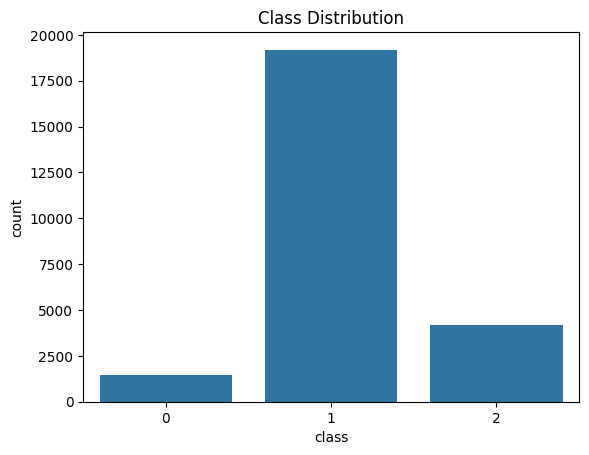

class
1    19190
2     4163
0     1430
Name: count, dtype: int64

In [6]:
sns.countplot(data=dataset, x="class")
plt.title("Class Distribution")
plt.show()

dataset['class'].value_counts()

In [8]:
dataset['Toxicity'] = dataset['class'].apply(lambda x: 0 if x ==2 else 1)
columns_to_drop = ['count', 'hate_speech', 'offensive_language', 'neither', 'class']
df = dataset.drop(columns=columns_to_drop, axis=1)
print(df.head())

                                               tweet  Toxicity
0  !!! RT @mayasolovely: As a woman you shouldn't...         0
1  !!!!! RT @mleew17: boy dats cold...tyga dwn ba...         1
2  !!!!!!! RT @UrKindOfBrand Dawg!!!! RT @80sbaby...         1
3  !!!!!!!!! RT @C_G_Anderson: @viva_based she lo...         1
4  !!!!!!!!!!!!! RT @ShenikaRoberts: The shit you...         1


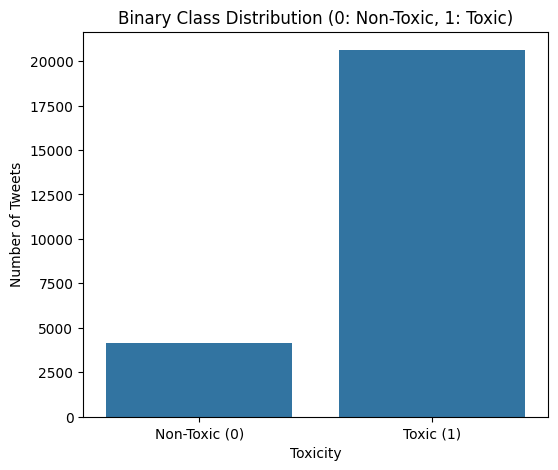

In [9]:
plt.figure(figsize=(6, 5))
sns.countplot(x='Toxicity', data=df)
plt.title('Binary Class Distribution (0: Non-Toxic, 1: Toxic)')
plt.xticks([0, 1], ['Non-Toxic (0)', 'Toxic (1)'])
plt.ylabel('Number of Tweets')
plt.show()

In [14]:
import nltk
import re
from nltk.corpus import stopwords
nltk.download('stopwords', quiet=True)

STOPWORDS = set(stopwords.words('english'))

def clean_text_for_wordcloud(text):
    """Simple cleaning for visualization purposes."""
    text = str(text).lower()
    #remove mentions, URLs, and special characters
    text = re.sub(r'@\w+', '', text)
    text = re.sub(r'http\S+', '', text)
    text = re.sub(r'[^a-z\s]', '', text)
    return ' '.join([word for word in text.split() if word not in STOPWORDS and len(word) > 2])

df['clean_tweet'] = df['tweet'].apply(clean_text_for_wordcloud)

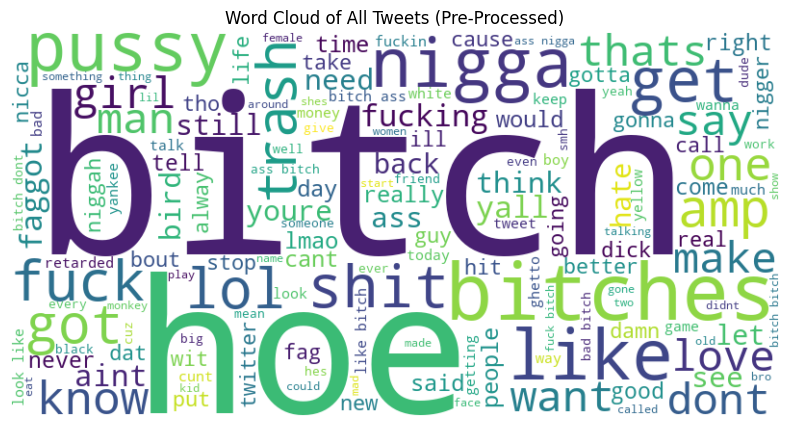

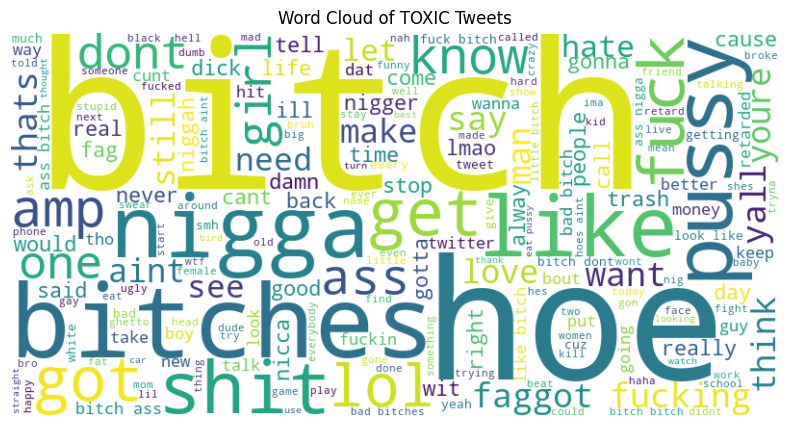

In [15]:
from wordcloud import WordCloud
all_text = ' '.join(df['clean_tweet'])

wordcloud_all = WordCloud(
    width=800, height=400,
    background_color='white',
    stopwords=STOPWORDS,
    min_font_size=10
).generate(all_text)

plt.figure(figsize=(10, 5))
plt.imshow(wordcloud_all, interpolation='bilinear')
plt.axis('off')
plt.title('Word Cloud of All Tweets (Pre-Processed)')
plt.show()

toxic_text = ' '.join(df[df['Toxicity'] == 1]['clean_tweet'])

wordcloud_toxic = WordCloud(
    width=800, height=400,
    background_color='white', 
    stopwords=STOPWORDS,
    min_font_size=10
).generate(toxic_text)

plt.figure(figsize=(10, 5))
plt.imshow(wordcloud_toxic, interpolation='bilinear')
plt.axis('off')
plt.title('Word Cloud of TOXIC Tweets')
plt.show()